# Solving of 1d laplace equation with Neumann condition with elimination method

$$
\begin{equation}
    \begin{cases}
        \frac{\partial^2 u}{\partial x^2} = \sin{x}, \; \frac{\pi}{2} < x < \frac{3\pi}{2}, \\
        u'(\frac{\pi}{2})=0, \;
        u(\frac{3\pi}{2})=1
    \end{cases}
\end{equation}
$$

In [38]:
import numpy as np
from helper import round_to
import matplotlib.pyplot as plt

In [39]:
def laplaceq_elimination(xd: np.ndarray[float], u: np.ndarray[float], h=0.1) -> np.ndarray[float]:
    n = len(xd)

    # constructing of matrix for elimination taking into boundary and initial conditions
    m = [[0] * (n + 1) for _ in range(n)]
    m[0][0], m[0][1] = -u[0], 1
    for i in range(1, n - 1):
        m[i][i - 1], m[i][i], m[i][i + 1] = 1, -2, 1
        m[i][-1] = np.sin(xd[i]) * h**2
    m[-1][-1], m[-1][-2] = 1, -u[-1]

    # constructing starting coefficients
    a, b = np.zeros(n), np.zeros(n)
    a[0], b[0] = -m[0][1] / m[0][0], m[0][-1] / m[0][0]

    # forward elimination
    for i in range(1, n):
        denom = (m[i][i] + a[i - 1] * m[i][i - 1])
        a[i] = -m[i][i + 1] / denom
        b[i] = (m[i][-1] - m[i][i - 1] * b[i - 1]) / denom
    a[-1] = 0
    
    # backward elimination
    for i in range(n - 2, -1, -1):
        u[i] = a[i] * u[i + 1] + b[i]
    
    # boundary condition
    u[0] = u[1]

    return u


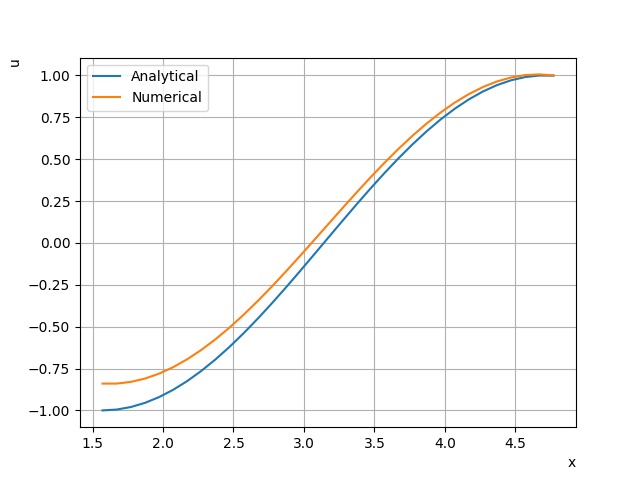

Absolute error: 0.16
Relation error: 31.28%


In [43]:
%matplotlib ipympl

h = 0.1
a, b = np.pi / 2, 3 * np.pi / 2

xd = np.arange(a, b + h, h)
n = len(xd)

u = np.zeros(n)
u[0] = 1  # beginning condition
u[-1] = 1 # boundary condition

u = laplaceq_elimination(xd, u, h=h)

# analytical solution
u_an = []
for x in xd:
    u_an.append(-np.sin(x))

fig, ax = plt.subplots()
ax.plot(xd, u_an)
ax.plot(xd, u)
ax.legend(["Analytical", "Numerical"])
ax.grid(axis="both")
ax.set_xlabel("x", loc="right")
ax.set_ylabel("u", loc="top")
plt.show()

abs_error = 0
rel_error = 0
for i in range(n):
    # big gap in the zero neighborhood
    if not (u[i] < -0.25 or u[i] > 0.25):
        continue
    abs_error = max(abs_error, abs(u_an[i] - u[i]))
    rel_error = max(rel_error, abs((u_an[i] - u[i]) / u_an[i]))

print(f"Absolute error: {round_to(abs_error)}\nRelation error: {round_to(rel_error * 100)}%")

Here, we take 2 step approximation of the derrivative in initial condition:

In [41]:
def laplaceq_elimination2(xd: np.ndarray[float], u: np.ndarray[float], h=0.1) -> np.ndarray[float]:
    n = len(xd)

    m = [[0] * (n + 1) for _ in range(n)]
    m[0][0], m[0][1], m[0][-1] = 1, -1, -h**2 * np.sin(xd[0]) / 2
    for i in range(1, n - 1):
        m[i][i - 1], m[i][i], m[i][i + 1] = 1, -2, 1
        m[i][-1] = np.sin(xd[i]) * h**2
    m[-1][-1], m[-1][-2] = 1, -u[-1]

    # constructing starting coefficients
    a, b = np.zeros(n), np.zeros(n)
    a[0], b[0] = -m[0][1] / m[0][0], m[0][-1] / m[0][0]

    # forward elimination
    for i in range(1, n):
        denom = (m[i][i] + a[i - 1] * m[i][i - 1])
        a[i] = -m[i][i + 1] / denom
        b[i] = (m[i][-1] - m[i][i - 1] * b[i - 1]) / denom
    a[-1] = 0
    
    # backward elimination
    for i in range(n - 2, -1, -1):
        u[i] = a[i] * u[i + 1] + b[i]
    
    # boundary condition
    u[0] = u[1]

    return u

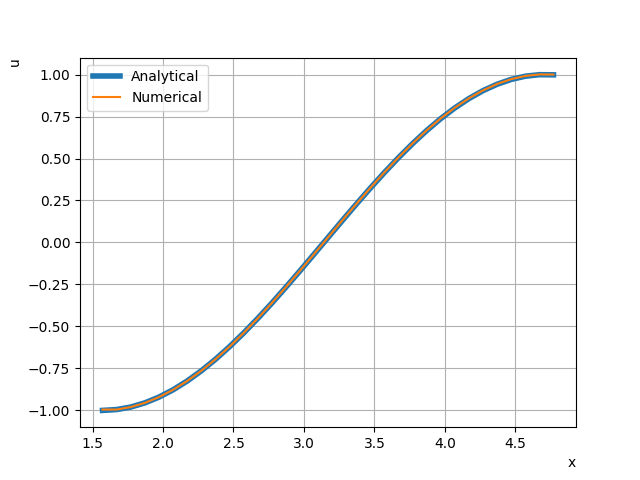

Absolute error: 0.005
Relation error: 3.07%


In [42]:
%matplotlib ipympl

h = 0.1
a, b = np.pi / 2, 3 * np.pi / 2

xd = np.arange(a, b + h, h)
n = len(xd)

u = np.zeros(n)
u[-1] = 1 # boundary condition

u = laplaceq_elimination2(xd, u, h=h)

u_an = []
for x in xd:
    u_an.append(-np.sin(x))

fig, ax = plt.subplots()
ax.plot(xd, u_an, linewidth=4)
ax.plot(xd, u)
ax.legend(["Analytical", "Numerical"])
ax.grid(axis="both")
ax.set_xlabel("x", loc="right")
ax.set_ylabel("u", loc="top")
plt.show()

abs_error = 0
rel_error = 0
for i in range(n):
    abs_error = max(abs_error, abs(u_an[i] - u[i]))
    rel_error = max(rel_error, abs((u_an[i] - u[i]) / u_an[i]))

print(f"Absolute error: {round_to(abs_error)}\nRelation error: {round_to(rel_error * 100)}%")
